# A simulation of Buffon's needle experiment to calculate $\pi$

This Jupyter notebook uses [ROOT](https://root.cern.ch/) for visualization:

In [1]:
import math
import random
import ROOT
import time

Welcome to JupyROOT 6.12/06


Enter number of simulated needles ($N_t$) and needle length over grid spacing ratio (*L/S*):

In [2]:
N_t = 1000    # between 0 and 1000000
LSratio = 0.8 # between 0 and 1

Create figure with gridlines:

In [3]:
mycanvas = ROOT.TCanvas('mycanvas', "Simulation of Buffon's needle experiment", 0, 0, 500, 500)
mycanvas.SetGridx(0)
mycanvas.SetGridy(0)

dummyhisto = ROOT.TH2D('dummyhisto', '', 100, -5, 5, 100, -5, 5)
dummyhisto.SetStats(0)
dummyhisto.Draw("")

gridlines = [] # to save TLine objects, otherwise they are not drawn

for i in range(-4, 5):
    gridline = ROOT.TLine(-5, i, 5, i)
    gridline.SetLineColor(1)
    gridline.Draw()
    gridlines.append(gridline)

Perform needle experiment simulation and plot results:

Total number of needles that crossed a grid line = 506 (out of 1000)

(total calculation time = 66.83 ms)


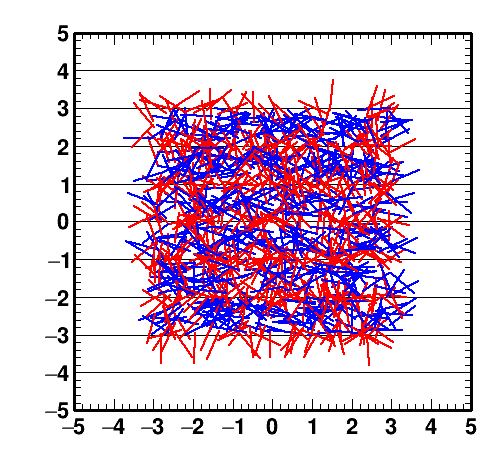

In [4]:
start = time.time()

# Loop over needles:
        
needles = [] # to save TLine objects, otherwise they are not drawn

N_c = 0

for i in range(N_t):

    # Create needle:
        
    x1    = 6*random.random()-3
    y1    = 6*random.random()-3
    angle = 2*math.pi*random.random()

    x2 = LSratio*math.cos(angle) + x1
    y2 = LSratio*math.sin(angle) + y1
        
    needle = ROOT.TLine(x1,y1,x2,y2)

    # Check if needle crossed a gridline:
        
    crossed = False
    for k in range(-3,4):
        if ((y2>k) and (y1<k)) or ((y2<k) and (y1>k)):
            crossed = True
                
    if crossed:
        N_c += 1
        needle.SetLineColor(2)
    else:
        needle.SetLineColor(4)
    needle.SetLineWidth(2)
        
    needle.Draw()
    needles.append(needle)   

mycanvas.Draw()
    
print('Total number of needles that crossed a grid line = {} (out of {})'.format(N_c, N_t))
print("")

end = time.time()
print('(total calculation time = {:.2f} ms)'.format((end - start)*1000))

Calculate $\pi_{\rm sim}$ from simulation result:

In [5]:
pi_approx = 2*LSratio*N_t/N_c

print('Needle length / Grid spacing (L/S)           = {}'.format(LSratio))
print('Total # of needles (N_t)                     = {}'.format(N_t)) 
print('Total # of needles that crossed a line (N_c) = {}'.format(N_c))
print('')
print('=> Pi_sim ~= 2*(L/S)*(N_t/N_c) = {}'.format(pi_approx))

Needle length / Grid spacing (L/S)           = 0.8
Total # of needles (N_t)                     = 1000
Total # of needles that crossed a line (N_c) = 506

=> Pi_sim ~= 2*(L/S)*(N_t/N_c) = 3.1620553359683794


Calculate the error between $\pi_{\rm sim}$ and the real $\pi$:

In [6]:
error = (pi_approx - math.pi)/math.pi * 100

print('=> (Pi_sim - Pi) / Pi * 100 = {:.3f}%'.format(error))

=> (Pi_sim - Pi) / Pi * 100 = 0.651%
